# Extracting dataset from Kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:51<00:00, 21.3MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.0MB/s]


In [ ]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import ResNet50

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
import numpy as np

In [ ]:
model= ResNet50(weights= 'imagenet')

102967424/102967424 [==============================] - 5s 0us/step


In [ ]:
img_path= '/content/tomato.jpg'
img= image.load_img(img_path, target_size=(224,224))
x= image.img_to_array(img)
x=np.expand_dims(x, axis=0)
x=preprocess_input(x)

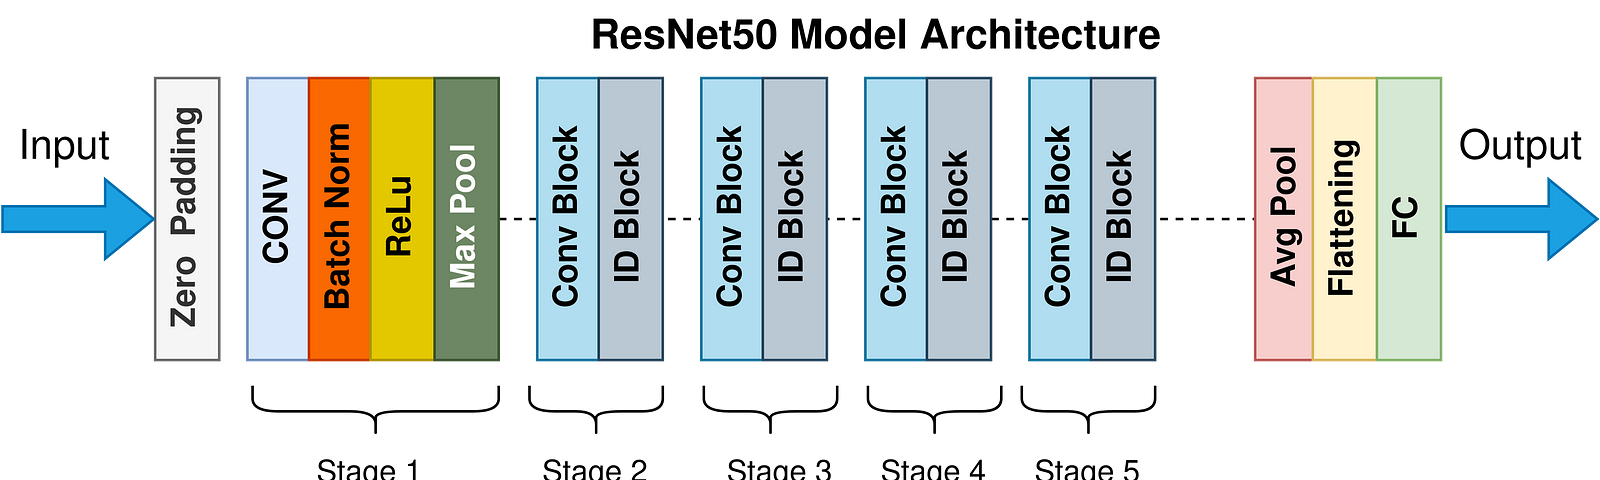

In [ ]:
x

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


In [ ]:
predict1= model.predict(x)
print('Predict the tomato image', decode_predictions(predict1, top=5)[0])

1/1 [==============================] - 0s 25ms/step
Predict the tomato image [('n07745940', 'strawberry', 0.2546745), ('n04023962', 'punching_bag', 0.056170408), ('n04522168', 'vase', 0.053151764), ('n12620546', 'hip', 0.048717506), ('n04560804', 'water_jug', 0.04706323)]


Case study

AlexNet

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
# Generate 
train_ds= keras.utils.image_dataset_from_directory(directory= '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))

Found 20000 files belonging to 2 classes.


In [ ]:
test_ds= keras.utils.image_dataset_from_directory(directory= '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))

Found 5000 files belonging to 2 classes.


In [ ]:
# Normalization
def process(image, label):
    image= tf.cast(image/255.0, tf.float32)
    return image, label

In [ ]:
train_ds= train_ds.map(process)
test_ds= test_ds.map(process)

In [ ]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

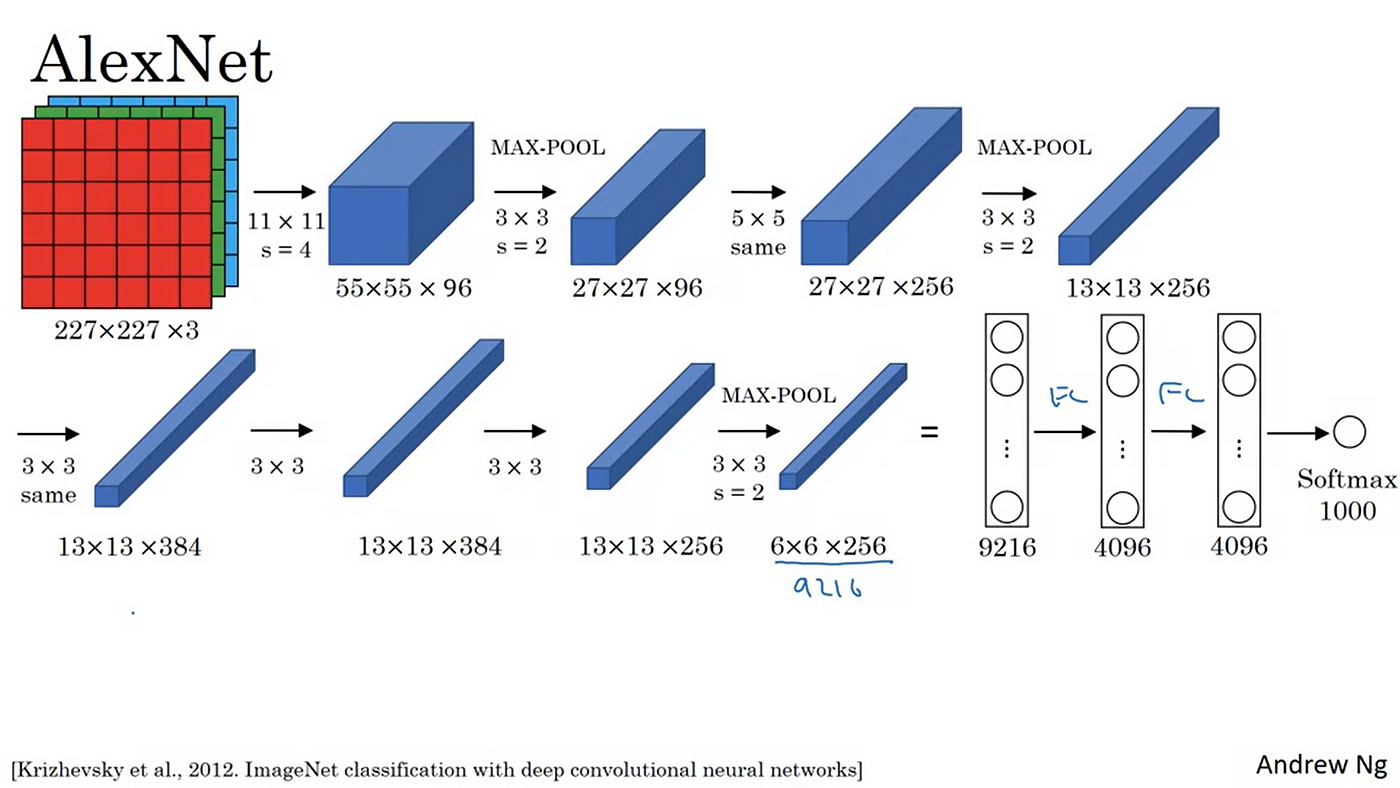

In [ ]:
model= Sequential()
model.add(Conv2D(96, kernel_size=(11,11), strides=4, padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size=(5,5), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))

model.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(9216, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4096, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4096, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization_11 (Bat  (None, 62, 62, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 30, 30, 256)       614656    
                                                                 
 batch_normalization_12 (Bat  (None, 30, 30, 256)      1024      
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(train_ds, validation_data= test_ds, batch_size= 64, epochs=10)

Epoch 1/10
625/625 [==============================] - 65s 88ms/step - loss: 0.8521 - accuracy: 0.6112 - val_loss: 0.7398 - val_accuracy: 0.5952
Epoch 2/10
625/625 [==============================] - 56s 88ms/step - loss: 0.6513 - accuracy: 0.6945 - val_loss: 1.1517 - val_accuracy: 0.5182
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.5009 - accuracy: 0.7713 - val_loss: 0.7083 - val_accuracy: 0.7304
Epoch 4/10
625/625 [==============================] - 55s 87ms/step - loss: 0.4266 - accuracy: 0.8041 - val_loss: 0.4574 - val_accuracy: 0.7924
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.3340 - accuracy: 0.8526 - val_loss: 0.4463 - val_accuracy: 0.7930
Epoch 6/10
625/625 [==============================] - 54s 85ms/step - loss: 0.2933 - accuracy: 0.8715 - val_loss: 0.4420 - val_accuracy: 0.7916
Epoch 7/10
625/625 [==============================] - 53s 84ms/step - loss: 0.2720 - accuracy: 0.8829 - val_loss: 0.4652 - val_accuracy: